<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [66]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [41]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


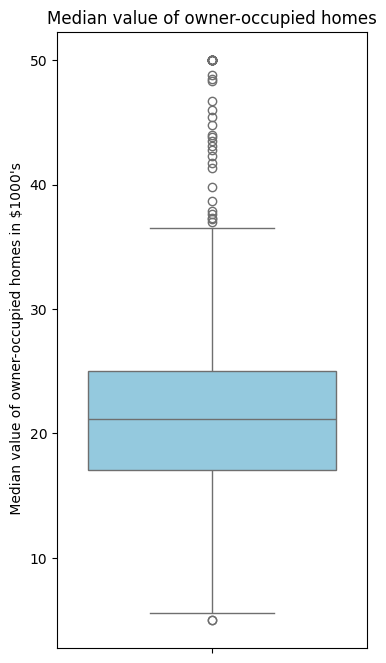

In [45]:
#For the "Median value of owner-occupied homes" provide a boxplot

pyplot.figure(figsize=(4,8))
sns.boxplot(data=boston_df, y="MEDV", color="skyblue")

pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel(" Median value of owner-occupied homes in $1000's")

pyplot.show()

#We can see that there is not much variability in the mean values, with a median equal to 21200. However, there are many unusually high values.

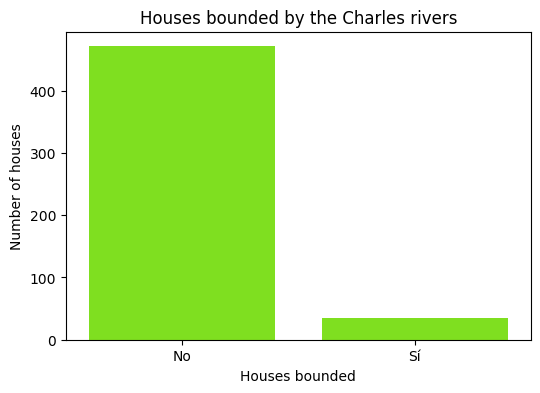

In [63]:
#Provide a bar plot for the Charles river variable

chas_counts = boston_df['CHAS'].value_counts()
chas_counts.index = ['No', 'Sí'] 

pyplot.figure(figsize=(6,4))
sns.barplot(x=chas_counts.index, y=chas_counts.values, color="chartreuse")

pyplot.title("Houses bounded by the Charles rivers")
pyplot.xlabel("Houses bounded")
pyplot.ylabel("Number of houses")


pyplot.show()

#We observed that the number of houses not limited by the Charles River is much greater.

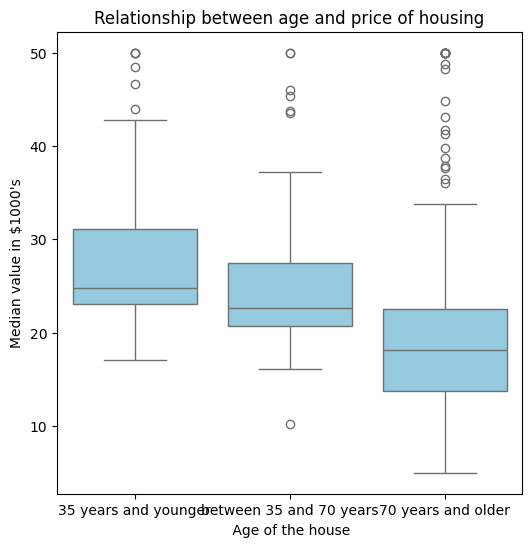

In [61]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

pyplot.figure(figsize=(6,6))
sns.boxplot(data=boston_df, x="age_group", y="MEDV", color="skyblue")

pyplot.title("Relationship between age and price of housing")
pyplot.xlabel(" Age of the house")
pyplot.ylabel("Median value in $1000's")

pyplot.show()



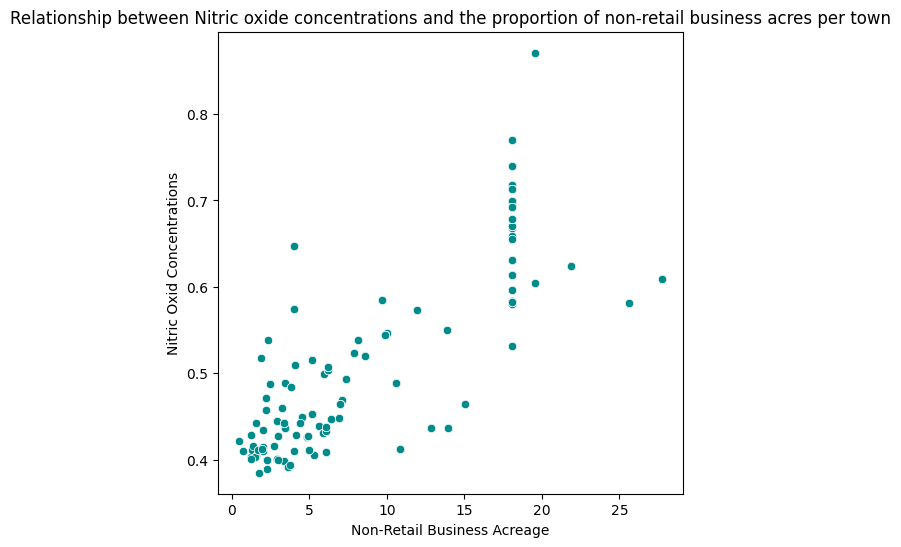

In [60]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

pyplot.figure(figsize=(6,6))
sns.scatterplot(data=boston_df, x='INDUS', y='NOX', color="darkcyan")

pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Non-Retail Business Acreage")
pyplot.ylabel("Nitric Oxid Concentrations")

pyplot.show()

#In general, the greater the number of non-retail businesses, the higher the concentration of nitrogen oxide, which is to be expected. 
#However, it is striking that around the value 17-18, there are many different values of nitrogen oxide concentration, which indicates that this variation is due to another variable 
#other than the number of non-retail businesses. It could be, for example, the type of industry to which the business belongs. A more in-depth exploratory analysis is required to 
#find out the possible causes.

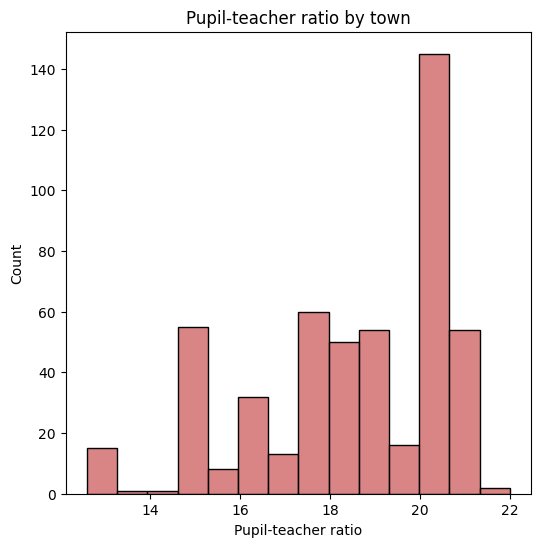

In [59]:
#Create a histogram for the pupil to teacher ratio variable

pyplot.figure(figsize=(6,6))
sns.histplot(data=boston_df, x='PTRATIO', color="indianred")

pyplot.title("Pupil-teacher ratio by town")
pyplot.xlabel("Pupil-teacher ratio")

pyplot.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")



In [72]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

#We reject the null hypothesis; there is a significant difference in the median price of homes bounded by the Charles River and those not bounded by the Charles River.

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three means are equal)
*   $H\_1:$ At least one of the means differ

In [74]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group']=='70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#We can say that there is a significant difference in the price of housing depending on the age of construction between at least one of the three groups.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ The Nitric oxide concentration is independent of the proportion of non-retail business acres per town
*   $H\_1:$ The Nitric oxide concentration is not independent of the proportion of non-retail business acres per town

In [76]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#We reject the null hypothesis; nitrogen oxide concentration is correlated with the number of non-retail businesses acres per town.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [77]:
X = boston_df['DIS']

y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict()

model.summary()

#We can say that the additional weighted distance to Boston's five employment centers affects the median home price, since the value of t = 5.79 with a value of p = 1.21e-08

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        18:24:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""